Graph saved as results/FV_BaselinePrompt_successor/accuracy_plot_FV_baselinePrompt_succ.pdf


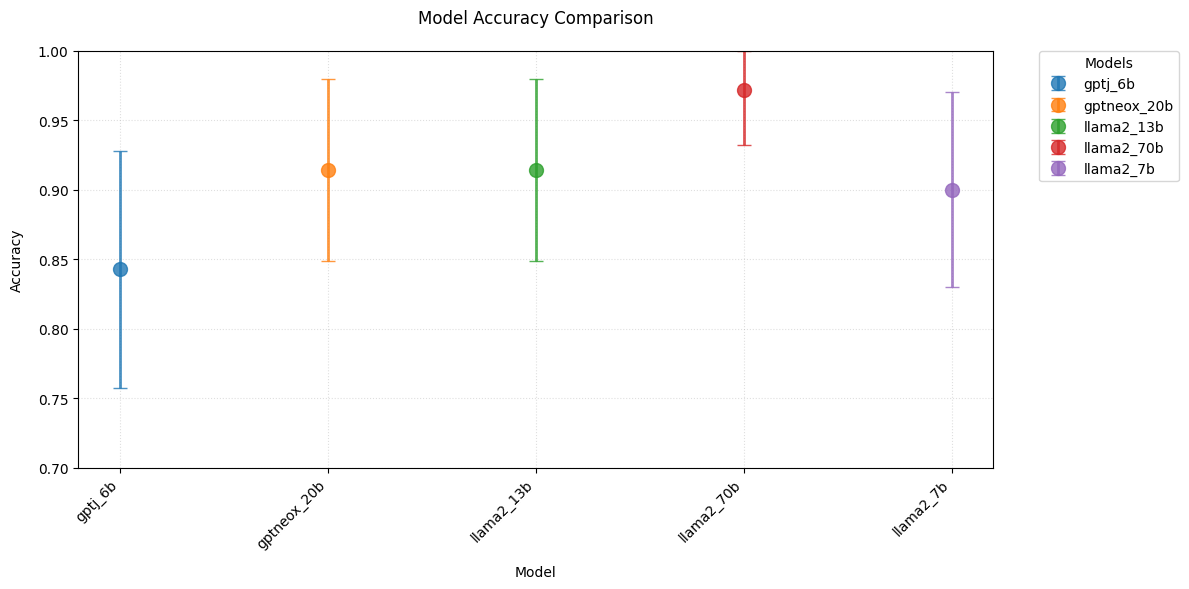

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_final_model_results(folder_path,save_as_pdf=False, output_name="model_accuracy_comparison.pdf"):
    """
    Final optimized version with:
    - Manual x-axis label formatting
    - Color scheme and legend
    - gpt2 and gptneo excluded
    - Professional visualization
    """
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

    if not csv_files:
        print("No CSV files found in the folder.")
        return

    plt.figure(figsize=(12, 6))

    # Configuration
    LABEL_MAPPING = {
        'gptj6b': 'gptj_6b',
        'gptneox20b': 'gptneox_20b',
        'llama213b': 'llama2_13b',
        'llama270b': 'llama2_70b',
        'llama27b': 'llama2_7b'
    }

    MODELS_TO_EXCLUDE = ['gpt2', 'gptneo']  # Case sensitive
    COLORS = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Matplotlib default colors

    plotted_models = []

    for i, csv_file in enumerate(csv_files):
        file_path = os.path.join(folder_path, csv_file)
        df = pd.read_csv(file_path)
        original_name = df['model_name'].iloc[0]

        # Skip excluded models
        if original_name in MODELS_TO_EXCLUDE:
            continue

        # Get formatted label
        display_name = LABEL_MAPPING.get(original_name, original_name)

        # Plot with consistent styling
        plt.errorbar(
            x=display_name,
            y=df['Accuracy'].iloc[0],
            yerr=[[df['Accuracy'].iloc[0] - df['CI_low'].iloc[0]],
                  [df['CI_high'].iloc[0] - df['Accuracy'].iloc[0]]],
            fmt='o',
            capsize=5,
            markersize=10,
            linewidth=2,
            color=COLORS[i % len(COLORS)],
            label=display_name,
            alpha=0.8
        )
        plotted_models.append(display_name)

    if not plotted_models:
        print("No models remaining after exclusions.")
        return

    # Enhanced styling
    plt.title('Model Accuracy Comparison', pad=20)
    plt.xlabel('Model', labelpad=10)
    plt.ylabel('Accuracy', labelpad=10)
    plt.xticks(rotation=45, ha='right')

    # Legend with model size indicators
    plt.legend(
        title='Models',
        bbox_to_anchor=(1.05, 1),
        loc='upper left',
        borderaxespad=0.
    )

    # Grid and layout
    plt.grid(True, linestyle=':', alpha=0.4)
    plt.gca().set_axisbelow(True)
    plt.tight_layout()

    # Adjust y-axis limits if needed
    plt.ylim(0.7, 1)  # Adjust based on your data range

    if save_as_pdf:
        plt.savefig(output_name, format='pdf', bbox_inches='tight', dpi=300)
        print(f"Graph saved as {output_name}")

    plt.show()

# Run with:
plot_final_model_results('results/FV_BaselinePrompt_successor',save_as_pdf=True,
                         output_name="results/FV_BaselinePrompt_successor/accuracy_plot_FV_baselinePrompt_succ.pdf")